In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from itertools import product
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df_list = []
for filename in glob.glob("/content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/*"):
  print("Processing " + filename)
  df = pd.read_pickle(filename)
  df_list.append(df)

X_train = pd.concat(df_list, axis=0)
X_train.count()

Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/54000-55000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/68001-69000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/55000-56000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/63001-64000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/40000-41000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/60001-61000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/45000-46000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/41000-42000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/51000-52000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/39000-40000_mfcc_EDA_data
Processing /content/drive/MyDrive/Colab Notebooks/ML Pickle Jar/38000-39000_mfcc_EDA_data
Processing

filename              73465
text                  73465
up_votes              73465
down_votes            73465
age                   73465
gender                73465
accent                63163
mean_RMSE             73465
mean_spec_centroid    73465
mfcc                  73465
meanff                72999
q1                    73465
iqr                   73465
chroma                73465
mel                   73465
dtype: int64

In [ ]:
sound_data = X_train.copy()

In [ ]:
sound_data = sound_data.drop(columns=['up_votes','down_votes','text','accent'])
sound_data.head()

,filename,age,gender,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
54000,cv-valid-train/sample-144055.mp3,twenties,female,0.039437,3159.358058,"[[-612.9525, -612.9525, -491.61044, -332.3799,...",282.113994,4.142055,6.068409,"[0.65857154, 0.69210935, 0.7477377, 0.7431431,...","[0.0864476, 0.10270987, 0.037023943, 0.0210874..."
54001,cv-valid-train/sample-144058.mp3,teens,female,0.005614,2062.450353,"[[-795.2182, -668.1944, -571.4752, -539.9249, ...",223.740071,0.048761,0.097836,"[0.50539166, 0.4827955, 0.4740552, 0.48310333,...","[7.225527e-05, 0.0001222074, 0.00038743683, 0...."
54002,cv-valid-train/sample-144059.mp3,fourties,male,0.112067,1899.267502,"[[-533.6654, -533.6654, -533.6654, -533.384, -...",177.586636,4.196453,7.341522,"[0.37892702, 0.42291144, 0.4985354, 0.5583515,...","[0.023197338, 0.016311014, 0.01608657, 0.02673..."
54003,cv-valid-train/sample-144060.mp3,twenties,male,0.052175,1759.663375,"[[-629.35974, -629.35974, -398.22308, -292.483...",138.589575,2.662296,4.447656,"[0.7817701, 0.7672898, 0.7418483, 0.6922519, 0...","[1.0545069, 2.7422826, 2.0142047, 3.1936238, 2..."
54004,cv-valid-train/sample-144061.mp3,twenties,male,0.061668,2615.568843,"[[-605.32446, -559.4649, -515.4156, -518.36707...",113.016359,3.182297,6.415670,"[0.6440214, 0.643037, 0.6902239, 0.626892, 0.5...","[0.11378394, 0.85902566, 2.7070951, 16.885046,..."


In [ ]:
sound_data.reset_index(drop=True, inplace=True)   

In [ ]:
sound_data.drop(sound_data[sound_data["gender"]=="other"].index, inplace=True)

In [ ]:
sound_data.drop(columns=["filename"], inplace=True)

In [ ]:
age_dict = {
    "teens": 0,
    "twenties": 1,
    "thirties": 2,
    "fourties": 3,
    "fifties": 4,
    "sixties": 5,
    "seventies": 6,
    "eighties": 7
}
gender_dict = {
    "male": 0,
    "female": 1
}

for i in range(sound_data.shape[0]):
  sound_data["age"].iloc[i] = age_dict[sound_data["age"].iloc[i]]
  sound_data["gender"].iloc[i] = gender_dict[sound_data["gender"].iloc[i]]

sound_data.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,age,gender,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
0,1,1,0.039437,3159.358058,"[[-612.9525, -612.9525, -491.61044, -332.3799,...",282.113994,4.142055,6.068409,"[0.65857154, 0.69210935, 0.7477377, 0.7431431,...","[0.0864476, 0.10270987, 0.037023943, 0.0210874..."
1,0,1,0.005614,2062.450353,"[[-795.2182, -668.1944, -571.4752, -539.9249, ...",223.740071,0.048761,0.097836,"[0.50539166, 0.4827955, 0.4740552, 0.48310333,...","[7.225527e-05, 0.0001222074, 0.00038743683, 0...."
2,3,0,0.112067,1899.267502,"[[-533.6654, -533.6654, -533.6654, -533.384, -...",177.586636,4.196453,7.341522,"[0.37892702, 0.42291144, 0.4985354, 0.5583515,...","[0.023197338, 0.016311014, 0.01608657, 0.02673..."
3,1,0,0.052175,1759.663375,"[[-629.35974, -629.35974, -398.22308, -292.483...",138.589575,2.662296,4.447656,"[0.7817701, 0.7672898, 0.7418483, 0.6922519, 0...","[1.0545069, 2.7422826, 2.0142047, 3.1936238, 2..."
4,1,0,0.061668,2615.568843,"[[-605.32446, -559.4649, -515.4156, -518.36707...",113.016359,3.182297,6.415670,"[0.6440214, 0.643037, 0.6902239, 0.626892, 0.5...","[0.11378394, 0.85902566, 2.7070951, 16.885046,..."


Gender

In [ ]:
def get_np_means(arr):
  return np.mean(arr.T, axis=0)

In [ ]:
gender_data = sound_data.copy()

gender_data["mfcc"] = gender_data["mfcc"].apply(get_np_means)
gender_data = gender_data.dropna()
gender_data.head()

,age,gender,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
0,1,1,0.039437,3159.358058,"[-323.7556, 52.31687, -11.036059, 30.32195, 21...",282.113994,4.142055,6.068409,"[0.65857154, 0.69210935, 0.7477377, 0.7431431,...","[0.0864476, 0.10270987, 0.037023943, 0.0210874..."
1,0,1,0.005614,2062.450353,"[-525.1003, 98.21939, 30.978971, 9.733958, 2.6...",223.740071,0.048761,0.097836,"[0.50539166, 0.4827955, 0.4740552, 0.48310333,...","[7.225527e-05, 0.0001222074, 0.00038743683, 0...."
2,3,0,0.112067,1899.267502,"[-311.9361, 88.32537, -9.368546, 22.019712, -2...",177.586636,4.196453,7.341522,"[0.37892702, 0.42291144, 0.4985354, 0.5583515,...","[0.023197338, 0.016311014, 0.01608657, 0.02673..."
3,1,0,0.052175,1759.663375,"[-242.15443, 127.29248, 0.61450374, 15.733196,...",138.589575,2.662296,4.447656,"[0.7817701, 0.7672898, 0.7418483, 0.6922519, 0...","[1.0545069, 2.7422826, 2.0142047, 3.1936238, 2..."
4,1,0,0.061668,2615.568843,"[-289.1359, 86.675575, 21.137707, 19.374666, -...",113.016359,3.182297,6.415670,"[0.6440214, 0.643037, 0.6902239, 0.626892, 0.5...","[0.11378394, 0.85902566, 2.7070951, 16.885046,..."


In [ ]:
y = gender_data['gender']

In [ ]:
gender_data = gender_data.drop(columns=["gender"])
gender_data.head(5)

,age,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
0,1,0.039437,3159.358058,"[-323.7556, 52.31687, -11.036059, 30.32195, 21...",282.113994,4.142055,6.068409,"[0.65857154, 0.69210935, 0.7477377, 0.7431431,...","[0.0864476, 0.10270987, 0.037023943, 0.0210874..."
1,0,0.005614,2062.450353,"[-525.1003, 98.21939, 30.978971, 9.733958, 2.6...",223.740071,0.048761,0.097836,"[0.50539166, 0.4827955, 0.4740552, 0.48310333,...","[7.225527e-05, 0.0001222074, 0.00038743683, 0...."
2,3,0.112067,1899.267502,"[-311.9361, 88.32537, -9.368546, 22.019712, -2...",177.586636,4.196453,7.341522,"[0.37892702, 0.42291144, 0.4985354, 0.5583515,...","[0.023197338, 0.016311014, 0.01608657, 0.02673..."
3,1,0.052175,1759.663375,"[-242.15443, 127.29248, 0.61450374, 15.733196,...",138.589575,2.662296,4.447656,"[0.7817701, 0.7672898, 0.7418483, 0.6922519, 0...","[1.0545069, 2.7422826, 2.0142047, 3.1936238, 2..."
4,1,0.061668,2615.568843,"[-289.1359, 86.675575, 21.137707, 19.374666, -...",113.016359,3.182297,6.415670,"[0.6440214, 0.643037, 0.6902239, 0.626892, 0.5...","[0.11378394, 0.85902566, 2.7070951, 16.885046,..."


In [ ]:
single_data_columns = ["mean_RMSE","mean_spec_centroid","meanff","q1","iqr"]

x = gender_data[single_data_columns]

In [ ]:
y=y.astype('int')

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state = 0)
os_x, os_y = oversampler.fit_sample(x, y)
x_train, x_test, y_train, y_test = train_test_split(os_x, os_y, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
ss = StandardScaler()
mm = MinMaxScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import cohen_kappa_score

In [ ]:
logisticRegression = linear_model.LogisticRegression()
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

**Test #1 - C**

default C='1.0'

In [ ]:
logisticRegression = linear_model.LogisticRegression(solver = 'newton-cg')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     43322
           1       0.90      0.85      0.87     43314

    accuracy                           0.88     86636
   macro avg       0.88      0.88      0.88     86636
weighted avg       0.88      0.88      0.88     86636

accuracy score: 0.87798374809548
cohen kappa score: 0.7559662346979126
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10826
           1       0.90      0.85      0.87     10834

    accuracy                           0.88     21660
   macro avg       0.88      0.88      0.88     21660
weighted avg       0.88      0.88      0.88     21660

accuracy sco

**Test #2 - C**

default C='0.5'

In [ ]:
logisticRegression = linear_model.LogisticRegression(C=0.5, solver = 'newton-cg', multi_class = 'multinomial')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     43322
           1       0.90      0.85      0.87     43314

    accuracy                           0.88     86636
   macro avg       0.88      0.88      0.88     86636
weighted avg       0.88      0.88      0.88     86636

accuracy score: 0.8779260353663604
cohen kappa score: 0.755850806040737
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10826
           1       0.90      0.85      0.87     10834

    accuracy                           0.88     21660
   macro avg       0.88      0.88      0.88     21660
weighted avg       0.88      0.88      0.88     21660

accuracy sc

**Test #3 - C**

default C='1.5'

In [ ]:
logisticRegression = linear_model.LogisticRegression(C=1.5, solver = 'newton-cg', multi_class = 'multinomial')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     43322
           1       0.90      0.85      0.87     43314

    accuracy                           0.88     86636
   macro avg       0.88      0.88      0.88     86636
weighted avg       0.88      0.88      0.88     86636

accuracy score: 0.8779491204580082
cohen kappa score: 0.7558969775039025
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10826
           1       0.90      0.85      0.87     10834

    accuracy                           0.88     21660
   macro avg       0.88      0.88      0.88     21660
weighted avg       0.88      0.88      0.88     21660

accuracy s

**Test #1 - Solver**

solver = 'saga'

In [ ]:
logisticRegression = linear_model.LogisticRegression(solver = 'saga', penalty='l2')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     43322
           1       0.90      0.85      0.87     43314

    accuracy                           0.88     86636
   macro avg       0.88      0.88      0.88     86636
weighted avg       0.88      0.88      0.88     86636

accuracy score: 0.8779260353663604
cohen kappa score: 0.755850806040737
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10826
           1       0.90      0.85      0.87     10834

    accuracy                           0.88     21660
   macro avg       0.88      0.88      0.88     21660
weighted avg       0.88      0.88      0.88     21660

accuracy sc

**Test #2 - Solver**

solver = 'lbfgs'

In [ ]:
logisticRegression = linear_model.LogisticRegression(solver = 'lbfgs', penalty='l2')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     43322
           1       0.90      0.85      0.87     43314

    accuracy                           0.88     86636
   macro avg       0.88      0.88      0.88     86636
weighted avg       0.88      0.88      0.88     86636

accuracy score: 0.8779260353663604
cohen kappa score: 0.755850806040737
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10826
           1       0.90      0.85      0.87     10834

    accuracy                           0.88     21660
   macro avg       0.88      0.88      0.88     21660
weighted avg       0.88      0.88      0.88     21660

accuracy sc

**Test #3 - Solver**

solver = 'sag'

In [ ]:
logisticRegression = linear_model.LogisticRegression(solver = 'sag', penalty='l2')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     43322
           1       0.90      0.85      0.87     43314

    accuracy                           0.88     86636
   macro avg       0.88      0.88      0.88     86636
weighted avg       0.88      0.88      0.88     86636

accuracy score: 0.8779491204580082
cohen kappa score: 0.7558969775039025
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10826
           1       0.90      0.85      0.87     10834

    accuracy                           0.88     21660
   macro avg       0.88      0.88      0.88     21660
weighted avg       0.88      0.88      0.88     21660

accuracy s

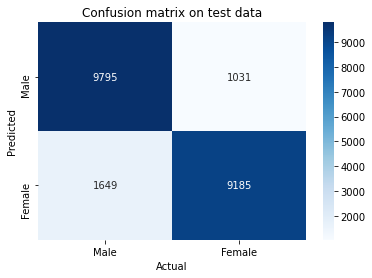

In [ ]:
#plot confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred) , index = ['Male', 'Female'] , columns = ['Male', 'Female'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['Male', 'Female'], yticklabels = ['Male', 'Female'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix on test data')
plt.show()

# Age

In [ ]:
y2 = gender_data['age']

In [ ]:
single_data_columns = ["mean_RMSE","mean_spec_centroid","meanff","q1","iqr"]

x = gender_data[single_data_columns]

In [ ]:
y2=y2.astype('int')

In [ ]:
gender_data.drop(gender_data[gender_data.age == 6].index, inplace=True)
gender_data.drop(gender_data[gender_data.age == 7].index, inplace=True)

In [ ]:
gender_data.head(20)

,age,mean_RMSE,mean_spec_centroid,mfcc,meanff,q1,iqr,chroma,mel
0,1,0.039437,3159.358058,"[-323.7556, 52.31687, -11.036059, 30.32195, 21...",282.113994,4.142055,6.068409,"[0.65857154, 0.69210935, 0.7477377, 0.7431431,...","[0.0864476, 0.10270987, 0.037023943, 0.0210874..."
1,0,0.005614,2062.450353,"[-525.1003, 98.21939, 30.978971, 9.733958, 2.6...",223.740071,0.048761,0.097836,"[0.50539166, 0.4827955, 0.4740552, 0.48310333,...","[7.225527e-05, 0.0001222074, 0.00038743683, 0...."
2,3,0.112067,1899.267502,"[-311.9361, 88.32537, -9.368546, 22.019712, -2...",177.586636,4.196453,7.341522,"[0.37892702, 0.42291144, 0.4985354, 0.5583515,...","[0.023197338, 0.016311014, 0.01608657, 0.02673..."
3,1,0.052175,1759.663375,"[-242.15443, 127.29248, 0.61450374, 15.733196,...",138.589575,2.662296,4.447656,"[0.7817701, 0.7672898, 0.7418483, 0.6922519, 0...","[1.0545069, 2.7422826, 2.0142047, 3.1936238, 2..."
4,1,0.061668,2615.568843,"[-289.1359, 86.675575, 21.137707, 19.374666, -...",113.016359,3.182297,6.415670,"[0.6440214, 0.643037, 0.6902239, 0.626892, 0.5...","[0.11378394, 0.85902566, 2.7070951, 16.885046,..."
5,1,0.033769,2205.459086,"[-367.50568, 96.72801, -8.143663, 9.963547, 10...",113.183642,1.465673,3.034528,"[0.7072556, 0.59555495, 0.57585114, 0.62714624...","[0.004379315, 0.004203852, 0.122990325, 1.1194..."
6,5,0.108916,1248.903086,"[-328.58585, 111.36799, 11.256596, 35.900635, ...",115.149465,1.212093,4.377011,"[0.5283287, 0.4418626, 0.43222657, 0.46452162,...","[0.056805577, 0.041678686, 0.40642342, 15.2434..."
7,2,0.075276,2421.661896,"[-321.28412, 90.93628, -22.1715, 46.005367, -3...",126.571258,1.352380,5.293802,"[0.5571444, 0.5998382, 0.6134252, 0.66572446, ...","[0.01776681, 0.024551092, 0.13230905, 1.392156..."
8,4,0.066603,1523.726420,"[-342.47943, 113.24594, -0.75693494, 38.086792...",149.290814,0.494992,0.860260,"[0.6722013, 0.68484336, 0.67068195, 0.6790199,...","[0.027043564, 0.018847737, 0.028539559, 0.4838..."
9,1,0.024409,2730.967836,"[-459.4827, 64.02558, -1.8895943, 24.700655, -...",212.821078,0.800317,1.891256,"[0.5557396, 0.5134966, 0.4616524, 0.54436463, ...","[0.00025009894, 0.00015233632, 0.00018660101, ..."


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state = 0)
os_x, os_y = oversampler.fit_sample(x, y2)
x_train, x_test, y_train, y_test = train_test_split(os_x, os_y, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
ss = StandardScaler()
mm = MinMaxScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import cohen_kappa_score

In [ ]:
logisticRegression = linear_model.LogisticRegression()
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

**Test #1 - Solver**

solver = 'lbfgs'

In [ ]:
logisticRegression = linear_model.LogisticRegression(solver = 'lbfgs', penalty='l2')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.20      0.07      0.11     17881
           1       0.20      0.37      0.26     17874
           2       0.18      0.20      0.19     17882
           3       0.20      0.37      0.26     17813
           4       0.26      0.20      0.23     17835
           5       0.27      0.04      0.08     17903

    accuracy                           0.21    107188
   macro avg       0.22      0.21      0.19    107188
weighted avg       0.22      0.21      0.19    107188

accuracy score: 0.2089133111915513
cohen kappa score: 0.043641887954528946
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.22      0.08      0.12      4450
          

**Test #2 - Solver**

solver = 'saga'

In [ ]:
logisticRegression = linear_model.LogisticRegression(solver = 'saga', penalty='l2')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.20      0.07      0.11     17881
           1       0.20      0.37      0.26     17874
           2       0.18      0.20      0.19     17882
           3       0.20      0.37      0.26     17813
           4       0.26      0.20      0.23     17835
           5       0.27      0.04      0.08     17903

    accuracy                           0.21    107188
   macro avg       0.22      0.21      0.19    107188
weighted avg       0.22      0.21      0.19    107188

accuracy score: 0.2089319699966414
cohen kappa score: 0.043737954631626
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.21      0.08      0.12      4450
           1 

**Test #3 - solver**

solver = 'newton-cg'

In [ ]:
logisticRegression = linear_model.LogisticRegression(solver = 'newton-cg')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.20      0.07      0.11     17881
           1       0.20      0.37      0.26     17874
           2       0.18      0.20      0.19     17882
           3       0.20      0.37      0.26     17813
           4       0.26      0.20      0.23     17835
           5       0.27      0.04      0.08     17903

    accuracy                           0.21    107188
   macro avg       0.22      0.21      0.19    107188
weighted avg       0.22      0.21      0.19    107188

accuracy score: 0.2089319699966414
cohen kappa score: 0.0437316363213196
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.21      0.08      0.12      4450
           1

**Test #1 - C**

c = 1.5

In [ ]:
logisticRegression = linear_model.LogisticRegression(C=1.5, solver = 'newton-cg', multi_class = 'multinomial')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.20      0.07      0.11     17881
           1       0.20      0.37      0.26     17874
           2       0.18      0.20      0.19     17882
           3       0.20      0.37      0.26     17813
           4       0.26      0.20      0.23     17835
           5       0.27      0.04      0.08     17903

    accuracy                           0.21    107188
   macro avg       0.22      0.21      0.19    107188
weighted avg       0.22      0.21      0.19    107188

accuracy score: 0.2089319699966414
cohen kappa score: 0.0437316363213196
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.21      0.08      0.12      4450
           1

**Test #2 - C**

c = '0.5'

In [ ]:
logisticRegression = linear_model.LogisticRegression(C=0.5, solver = 'newton-cg', multi_class = 'multinomial')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.20      0.07      0.11     17881
           1       0.20      0.37      0.26     17874
           2       0.18      0.20      0.19     17882
           3       0.20      0.37      0.26     17813
           4       0.26      0.20      0.23     17835
           5       0.27      0.04      0.08     17903

    accuracy                           0.21    107188
   macro avg       0.22      0.21      0.19    107188
weighted avg       0.22      0.21      0.19    107188

accuracy score: 0.2089319699966414
cohen kappa score: 0.04370796006314548
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.21      0.08      0.12      4450
           

In [ ]:
logisticRegression = linear_model.LogisticRegression(solver = 'sag', penalty='l2')
logisticRegression.fit(x_train, y_train)

y_train_pred = logisticRegression.predict(x_train)
y_test_pred = logisticRegression.predict(x_test)

classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train_pred, y_train)
cohen_kappa_score_train = cohen_kappa_score(y_train, y_train_pred, weights = 'quadratic')

classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test_pred, y_test)
cohen_kappa_score_test = cohen_kappa_score(y_test, y_test_pred, weights = 'quadratic')

print("-" * 50)
print("TRAIN")
print("-" * 50)
print("classification report: ")
print(classification_report_train)
print("accuracy score: " + str(accuracy_train))
print("cohen kappa score: " + str(cohen_kappa_score_train))
print("-" * 50)
print("TEST")
print("-" * 50)
print("classification report: ") 
print(classification_report_test)
print("accuracy score: " + str(accuracy_test))
print("cohen kappa score: " + str(cohen_kappa_score_test))

--------------------------------------------------
TRAIN
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.20      0.07      0.11     17881
           1       0.20      0.37      0.26     17874
           2       0.18      0.20      0.19     17882
           3       0.20      0.37      0.26     17813
           4       0.26      0.20      0.23     17835
           5       0.27      0.04      0.08     17903

    accuracy                           0.21    107188
   macro avg       0.22      0.21      0.19    107188
weighted avg       0.22      0.21      0.19    107188

accuracy score: 0.2089319699966414
cohen kappa score: 0.043737954631626
--------------------------------------------------
TEST
--------------------------------------------------
classification report: 
              precision    recall  f1-score   support

           0       0.21      0.08      0.12      4450
           1 

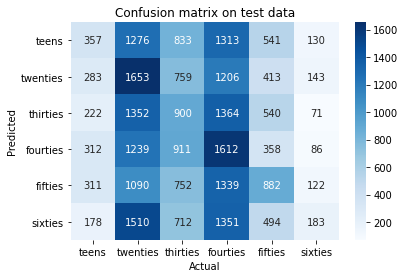

In [ ]:
#plot confusion matrix for age

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred) , index = ['teens','twenties','thirties','fourties','fifties','sixties'] , columns = ['teens','twenties','thirties','fourties','fifties','sixties'])
sns.heatmap(cm,cmap= 'Blues', annot = True, fmt='', xticklabels = ['teens','twenties','thirties','fourties','fifties','sixties'], yticklabels = ['teens','twenties','thirties','fourties','fifties','sixties'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix on test data')
plt.show()